# EP02 - Parte 1 - Visão e processamento de imagens

Integrantes: 

- Bruna Lobato - 10666972
- Felipe Noronha - 10737032
- Izabela Fonsceca - 11583721

---

## 1. Introdução

Você pode conferir a entrega anterior e todas as imagens que constituem a base de dados no [GitHub do projeto](https://github.com/fcnoronha/visao-e-prcessamento-de-imagens).

Esse Jupyter Notebook representa a Parte 1 desta tarefa, que consiste em realizar **data augmentation** do dataset original. Para isso, vamos criar 2 novos datasets, são eles:

- `original-gray`: consiste de todas as imagens do dataset original (chamado de `raw`) convertidas de RGB para niveis de cinza.
- `augmented`: consiste das imagens de `original-gray` onde, para cada imagem, além de sua cópia, teremos mais 4 variantes da mesma, cada uma sendo uma aplicação das funções abaixo:
    - Soma de fundo com gradiente de níveis de cinza;
    - Logaritmo da imagem;
    - Exponencial da imagem;
    - Filtro da média implementado usando convolução.

Para isso, utilizaremos metodos do pacote `scikit-image` e `cv2`.

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

from PIL import ImageOps, Image

from skimage.exposure import adjust_log
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io

# caminhos para os datasets
RAW_PATH = 'datasets/raw/'
GRAY_PATH = 'datasets/original-gray/'
AUG_PATH = 'datasets/augmented/'

## 2. Importanto a base da dados

Os blocos a seguir podem ser usados para importar a base de dados.

In [100]:
# monta arquivos a partir do Github

# !rm -rf tmp imagens
# !git clone --depth 1 https://github.com/fcnoronha/visao-e-prcessamento-de-imagens tmp
# !mv -v tmp/datasets .

In [101]:
# monta arquivos a partir do Drive

# from google.colab import drive
# drive.mount('/content/drive')
# !cp -a /content/drive/Shareddrives/visao-e-processamento-de-imagens/. .
# drive.flush_and_unmount()

## 3. Niveis de cinza

Abaixo, utilizamos a função `rgb2gray` para criar o dataset `original-gray`.

In [102]:
for path, dirs, files in os.walk(RAW_PATH):
    for file in files:
        image_path = os.path.join(path, file)
        img = io.imread(image_path)
        img_gray = rgb2gray(img)
        io.imsave(GRAY_PATH + file, img_as_ubyte(img_gray), quality=100)

## 4. Augmented dataset

Aqui, realizamos a _data augmentation_ do dataset `original-gray`, utilizandos as funções `adjust_log` e `filter2D` do scikit image e openCV, respectivamente.

In [103]:
for path, dirs, files in os.walk(GRAY_PATH):
    for file in files:
        image_name = file[:-4]
        image_path = os.path.join(path, file)
        image = io.imread(image_path, as_gray=True)

        # imagem gray
        io.imsave(AUG_PATH + image_name + '_gray.jpg', img_as_ubyte(image), quality=100, check_contrast=False)

        # imagem + gradiente
        height, width = image.shape
        gradient = np.tile(np.linspace(0, 1, height), (width, 1)).T*255
        image_grad = ((image + gradient) / 2).astype(np.uint8)
        io.imsave(AUG_PATH + image_name + '_grad.jpg', img_as_ubyte(image_grad), quality=100, check_contrast=False)

        # logaritmo da imagem
        image_log = adjust_log(image, inv=False)
        io.imsave(AUG_PATH + image_name + '_log.jpg', img_as_ubyte(image_log), quality=100, check_contrast=False)

        # exponencial da imagem
        image_exp = adjust_log(image, inv=True) # log invertido
        io.imsave(AUG_PATH + image_name + '_exp.jpg', img_as_ubyte(image_exp), quality=100, check_contrast=False)

        # filtro de média usando convolucao
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        kernel = np.ones((3, 3))/9
        image_mean = cv2.filter2D(image, -1, kernel) # -1 -> mesma profundidade
        io.imsave(AUG_PATH + image_name + '_mean.jpg', img_as_ubyte(image_mean), quality=100, check_contrast=False)

## 5. Visualização da base

Abaixo, visualizamos algumas imagens do dataset `augmented`.

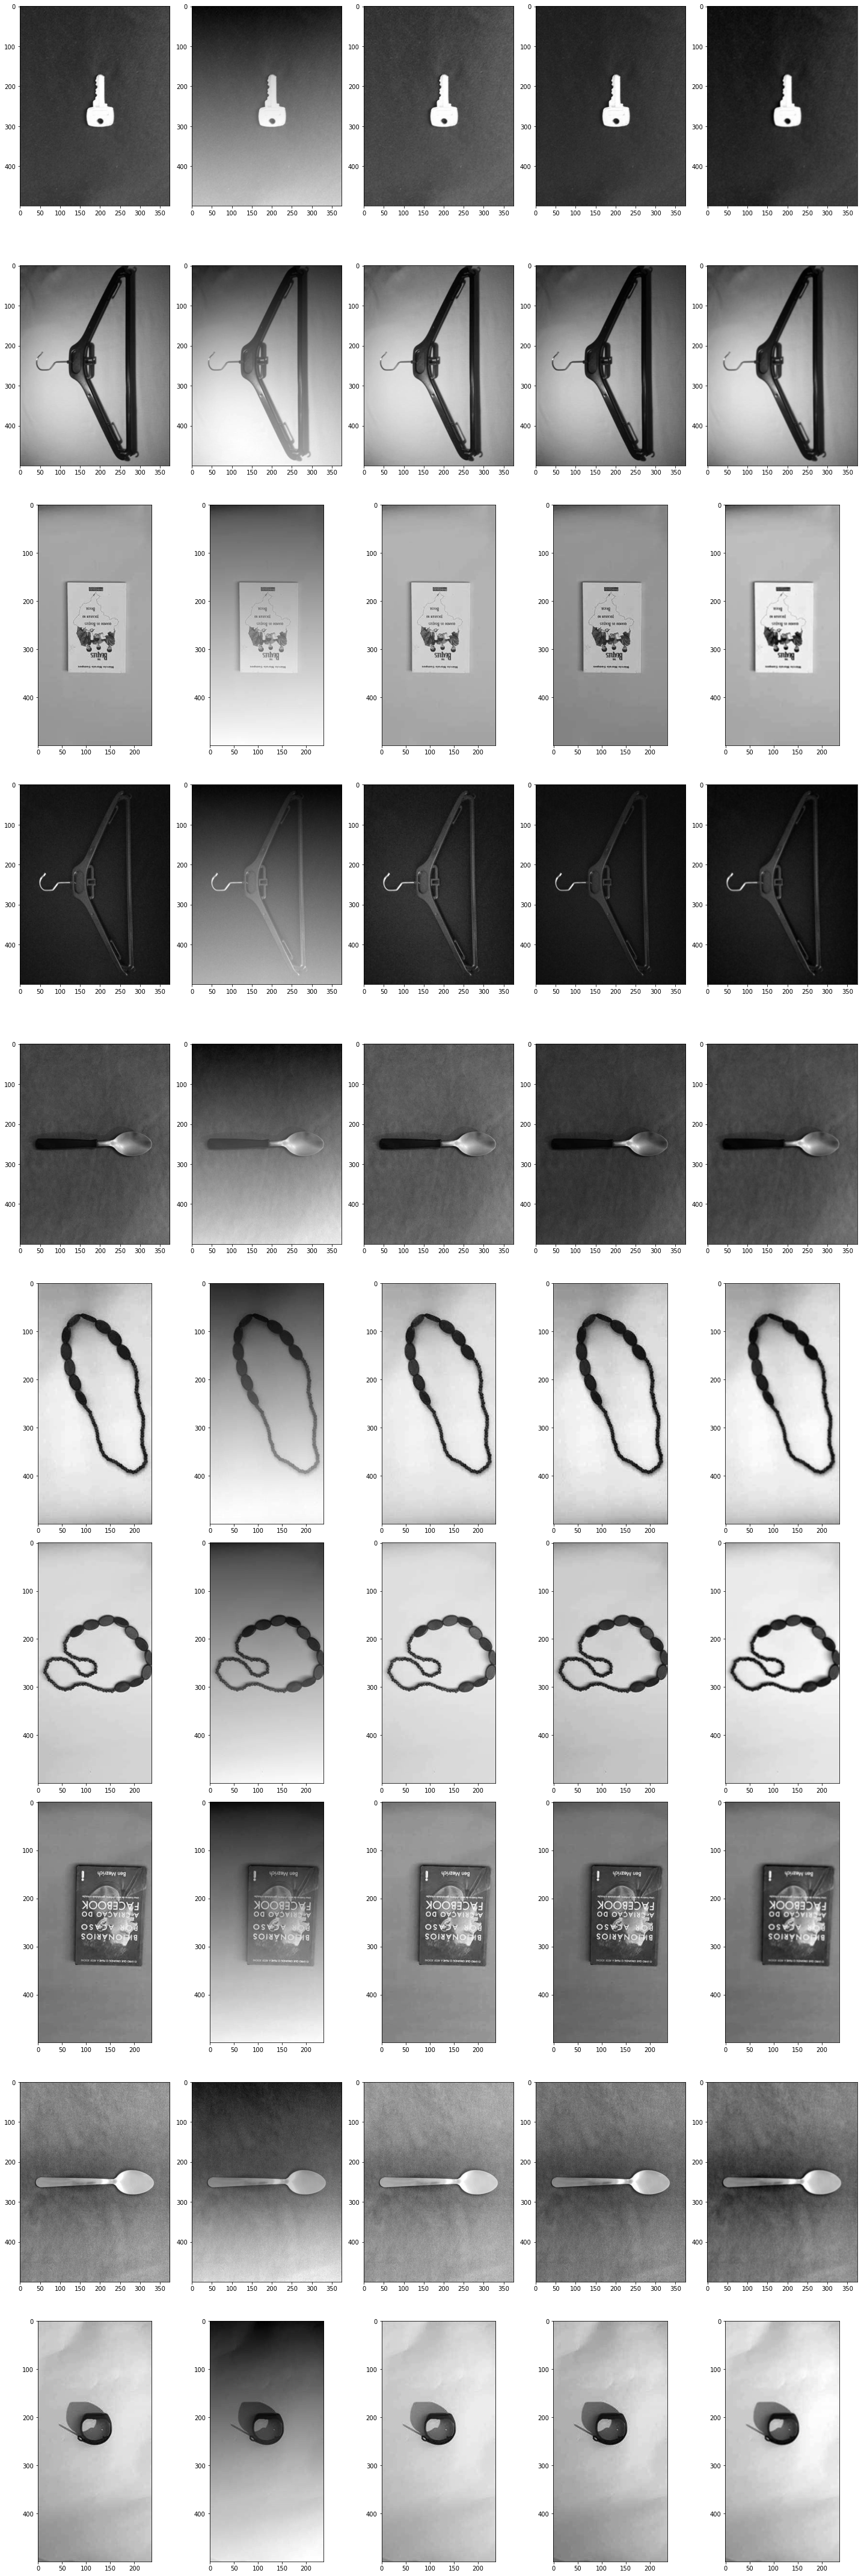

In [106]:
num_row = 10
num_col = 5

images_names = []
for path, dirs, files in os.walk(GRAY_PATH):
    for file in files:
        images_names.append(file)

images = []
suffixes = ['_gray', '_grad', '_log', '_exp', '_mean']
for img in random.sample(images_names, num_row):
    for s in suffixes:
        path = AUG_PATH + img[:-4] + s + '.jpg'
        images.append(io.imread(path, as_gray=True))

fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col, 6*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')

plt.tight_layout()
plt.show()